import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as skim
from skimage import io
from skimage.util import crop
import matplotlib.image as mpimg

definition function

In [2]:
def thresholding(thresh,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>thresh and img[i,j][1]>thresh and img[i,j][2]>thresh ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [3]:
def thresholding_2value(min_th,max_th,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>max_th and img[i,j][1]>max_th and img[i,j][2]>max_th ):
                new_img[i,j] = [255,255,255]
            if(img[i,j][0]<min_th and img[i,j][1]<min_th and img[i,j][2]<min_th ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [4]:
def find_length(img,position = True): #input must thresholding before
    nrow, ncol, ncolor  = img.shape
    right_position = []
    left_position = []
    #find all left side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0] < 255 ):
                temp1.append((i,j))
                break
    #find true left side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    min_col = np.min(temp2)
    #find center true left side
    temp3 = []
    for i in range(nrow):
        if(img[i,min_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    left_position = [min_row,min_col]
    # print(left_position)

    #find all right side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            i_inverse = (nrow-1) - i
            j_inverse = (ncol-1) - j
            if(img[i_inverse,j_inverse][0] < 255 ):
                temp1.append((i_inverse,j_inverse))
                break
    #find true right side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    max_col = np.max(temp2)
    #find center true right side
    temp3 = []
    for i in range(nrow):
        if(img[i,max_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    right_position = [min_row,max_col]
    if(position == True):
        print(left_position)
        print(right_position)

    #find length with pythagoras theorem
    base = np.abs(right_position[1] - left_position[1])
    perp = np.abs(left_position[0] - right_position[0])
    length = np.hypot(base, perp)
    # print("length of picture is " , length , str("pixel"))
    return length
    

In [5]:
def plot_compare_img(img1,img2):
    plt.figure(figsize=(20,10))
    plt.subplot(121), plt.imshow(img1), plt.axis('off') 
    plt.subplot(122), plt.imshow(img2), plt.axis('off') 
    plt.show()  

In [6]:
def plot_histogram(img):
    _ = plt.hist(img.ravel(), bins = 256, color = 'orange', )
    _ = plt.hist(img[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
    _ = plt.hist(img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    _ = plt.hist(img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
    _ = plt.xlabel('Intensity Value')
    _ = plt.ylabel('Count')
    _ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
    plt.show()

In [13]:
def pixel_to_cm(pixel):
    return (pixel*0.5)/65

make measure image

In [9]:
def_img = io.imread("image\\10.08.2020 Heptane-water\\frame 4\\12-06-14 PM\\P1040747 1696.jpg", as_gray=False)
def_img.shape

(1080, 1920, 3)

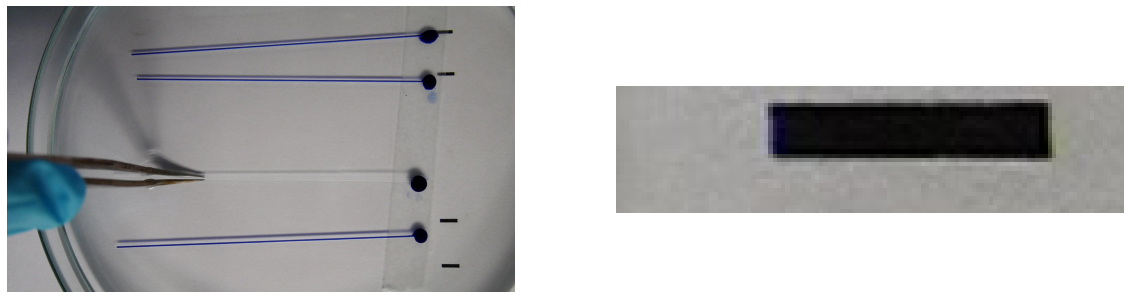

In [10]:
measure_im = crop(def_img, ((800, 250), (1600, 200), (0,0)), copy=False)
# print(def_img.shape, measure_im.shape)
plot_compare_img(def_img,measure_im)

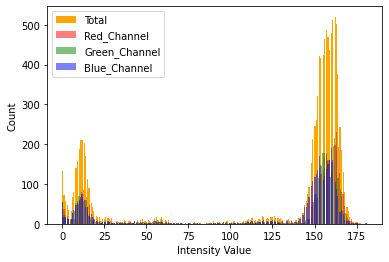

In [11]:
plot_histogram(measure_im)

[11, 37]
[16, 102]


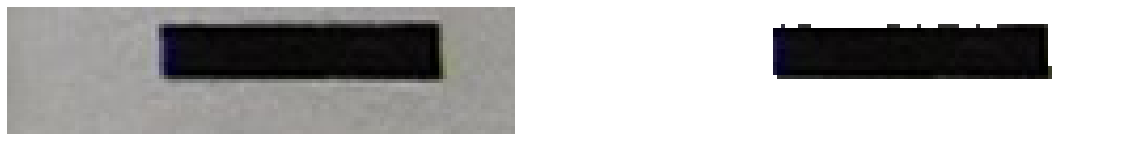

length of picture is  65.19202405202648 pixel


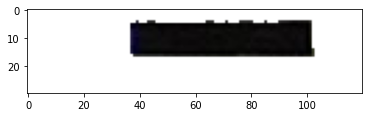

In [12]:
thresh_measure_im = thresholding(50,measure_im)
l = find_length(thresh_measure_im)
plot_compare_img(measure_im,thresh_measure_im)
plt.imshow(thresh_measure_im)
print("length of picture is " , l , str("pixel"))

65 pixel = 0.5 cm

x pixel = y cm


y cm = (x pixel* 0.5) / 65


find definition length on 3571 picture

(1080, 1920, 3) (170, 820, 3)


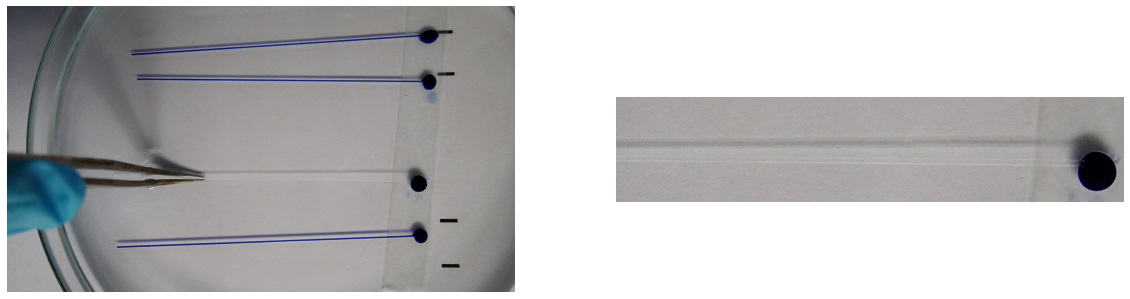

In [27]:
def_crop_im = crop(def_img, ((550, 360), (780, 320), (0,0)), copy=False)
print(def_img.shape, def_crop_im.shape)
plot_compare_img(def_img,def_crop_im)

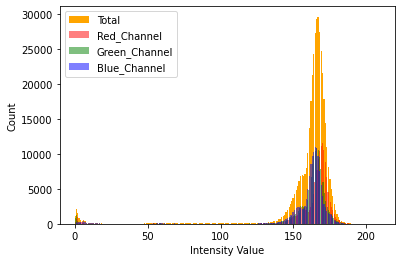

In [28]:
plot_histogram(def_crop_im)

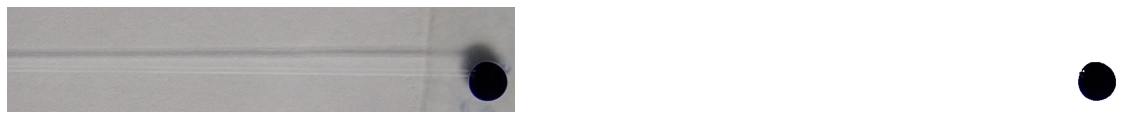

In [29]:
Tdef_img2 = thresholding(30,def_crop_im)
plot_compare_img(def_crop_im,Tdef_img2)


[122, 746]
[123, 806]
ldef  60.00833275470999 pixel


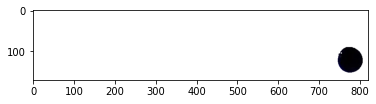

In [30]:
ldef = find_length(Tdef_img2)
plt.imshow(Tdef_img2)
print("ldef " , ldef , str("pixel"))

find length on crop value 1 from 1696 to 1765

In [31]:
number_of_picture = 1696
thresh = 30
template1 = []
l_def = 60.00833275470999
#1765-1696 = 69
for i in range(70):
    if(True) :   
        image = mpimg.imread( "image\\10.08.2020 Heptane-water\\frame 4\\12-06-14 PM\\P1040747 " + str(number_of_picture + i).zfill(4) + ".jpg" )
        crop_image = crop(image, ((550, 360), (780, 320), (0,0)), copy=False)
        thresh_image = thresholding(thresh,crop_image)
        # plot_compare_img(crop_image,thresh_image)
        length = find_length(thresh_image,False)
        length = length - l_def
        length = int(length)
        template1.append(length)
        # print(i, length)
        # plt.figure()
        # plt.imshow(thresh_image)
        # for i in range(len(template1)/2):
        #     if(template1[i] > 70):


In [32]:
print(template1)
print(len(template1))

[0, 3, 3, 4, 6, 9, 10, 12, 14, 16, 18, 21, 23, 25, 27, 29, 31, 34, 37, 45, 48, 50, 53, 56, 60, 62, 64, 67, 70, 72, 75, 78, 81, 83, 87, 89, 92, 95, 98, 101, 104, 106, 109, 111, 114, 117, 121, 124, 127, 129, 133, 135, 138, 141, 144, 145, 150, 153, 156, 162, 164, 166, 166, 168, 173, 176, 181, 184, 185, 186]
70


find length on crop value 2 from 1766 to 2784 

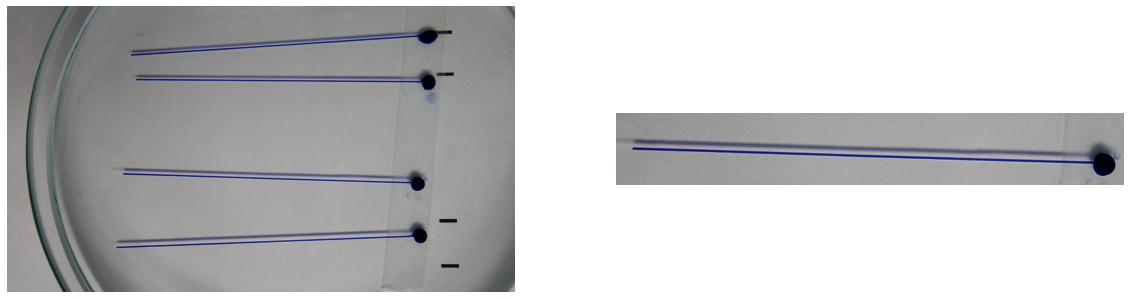

In [36]:
image = mpimg.imread( "image\\10.08.2020 Heptane-water\\frame 4\\12-06-14 PM\\P1040747 " + str(2784).zfill(4) + ".jpg" )
crop_image = crop(image, ((550, 360), (400, 320), (0,0)), copy=False)
plot_compare_img(image,crop_image)

In [37]:
number_of_picture = 1766
thresh = 30
template2 = []
l_def = 60.00833275470999
#2784-1766 = 1018
for i in range(1019):
    if( True) :
        image = mpimg.imread( "image\\10.08.2020 Heptane-water\\frame 4\\12-06-14 PM\\P1040747 " + str(number_of_picture + i).zfill(4) + ".jpg" )
        crop_image = crop(image, ((550, 360), (400, 320), (0,0)), copy=False)
        if(True):
            thresh_image = thresholding(thresh,crop_image)
        else:
            thresh_image = thresholding(40,crop_image)
        # plot_compare_img(crop_image,thresh_image)
        # print(i)
        length = find_length(thresh_image,False)
        length = length - l_def
        length = int(length)
        template2.append(length)
        # print(i, length)
        # plt.figure()
        # plt.imshow(thresh_image)

In [38]:
print(template2)
print(len(template2))

[190, 194, 200, 201, 203, 205, 209, 212, 216, 217, 219, 225, 228, 231, 233, 235, 238, 241, 244, 249, 251, 253, 255, 259, 262, 265, 268, 271, 273, 276, 278, 283, 286, 289, 291, 293, 296, 300, 303, 305, 308, 311, 314, 317, 320, 322, 325, 328, 331, 334, 337, 339, 342, 345, 348, 351, 354, 357, 359, 362, 365, 368, 371, 374, 376, 379, 382, 385, 387, 390, 393, 395, 398, 400, 403, 406, 409, 411, 413, 416, 419, 422, 424, 426, 428, 431, 435, 437, 439, 442, 444, 448, 450, 453, 454, 457, 460, 462, 466, 469, 471, 473, 476, 478, 481, 484, 487, 490, 491, 494, 496, 499, 501, 504, 507, 509, 512, 515, 517, 519, 522, 525, 527, 530, 532, 534, 537, 539, 542, 544, 546, 549, 551, 553, 555, 559, 561, 564, 566, 567, 570, 573, 576, 578, 581, 583, 585, 588, 590, 592, 595, 598, 600, 602, 604, 607, 610, 611, 614, 616, 620, 621, 623, 626, 628, 631, 633, 635, 637, 639, 642, 645, 647, 649, 651, 653, 655, 657, 659, 661, 667, 673, 678, 683, 688, 693, 697, 703, 709, 715, 720, 723, 726, 728, 731, 736, 742, 748, 753, 756,

concat 2 template and calculate pixel to centimeter

In [39]:
l_array = np.concatenate((template1,template2), axis=0)
# print(l_array)
# print(type(l_array[1]))
# print(l_array.shape)
l_array = l_array.astype('float32')

#find missing value and set to 0
for i in range(len(l_array)):
    if(l_array[i] < 0 ):
        l_array[i] = 0

for i in range(len(l_array)):
    l_array[i] = pixel_to_cm(l_array[i])

In [40]:
print(l_array)

[0.         0.02307692 0.02307692 ... 8.292308   8.292308   8.292308  ]


export data to exel

In [41]:
import pandas as pd

In [42]:
print(len(l_array))

1089


In [43]:
data = []
num_img = 1696
for i in range(len(l_array)):
    data.append(( " P1040747 " + str(num_img + i).zfill(4)  ,l_array[i] )) 
# print(data)
dataframe = pd.DataFrame(data, 
             columns=['image_name', 
                      'length(cm)'])
# print(dataframe)
# writing to Excel
datatoexcel = pd.ExcelWriter('Heptane-water(4)_10.08.2020_12-06-14-PM.xlsx')
# write DataFrame to excel 
dataframe.to_excel(datatoexcel)
#save the excel
datatoexcel.save()


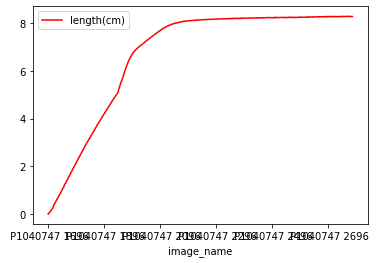

In [44]:
dataframe.plot(kind='line',x='image_name',y='length(cm)',color='red')
plt.show()